## Fonte de Dados

Como fonte de dados usaremos o web site <a href="https://www.hubertiming.com/">Huber Timing</a> que contém o resultado das corridas que acontecem nos EUA, bem como a agenda de novos eventos.

Aqui a página com o resultado da corrida que faremos a análise:

https://www.hubertiming.com/results/2017GPTR10K

### Carregamento de Bibliotecas e Pacotes que serão utilizados

In [2]:
# Imports
import re
import requests
import matplotlib as m
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
from scipy import stats

# Imports para formatação dos gráficos
sns.set_style('whitegrid')
%matplotlib inline

## Web Scraping

In [4]:
# Definindo a URL com o resultado da corrida
url = 'https://www.hubertiming.com/results/2017GPTR10K'

In [5]:
# Abre a conexão com a url
html = urlopen(url)

In [6]:
# Extrai o código HTML
soup = bs(html,'lxml')

In [7]:
# Extrai o texto do código html
texto = soup.get_text()

In [8]:
# Vamos visualizar as 10 primeiras linhas
linhas = soup.find_all('tr')
print(linhas[:10])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

      

### Limpeza e Transformação

Obter todas as linhas da tabela em forma de lista e depois converter essa lista em um dataframe para facilitar a manipulação.

In [9]:
# Loop
for linha in linhas:
    linha_td = linha.find_all('td')

In [10]:
print(linha_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


Extrair os dados das tags HTML com expressões regulares do Python

In [11]:
# Lista vazia para receber as linhas
lista_linhas = []

In [12]:
# Loop
for linha in linhas:
    cells = linha.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '', str_cells))
    lista_linhas.append(clean2)

In [13]:
print(clean2)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


Converter a lista em um dataframe

In [14]:
# Convertemos a lista em dataframe
df = pd.DataFrame(lista_linhas)

In [15]:
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


Limpar os dados para melhor visualização

In [16]:
# Dividindo cada linha e separando os dados a cada vírgula
df1 = df[0].str.split(',', expand = True)

In [17]:
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [18]:
# Removemos colchetes de abertura (lado esquerdo) do texto
df1[0] = df1[0].str.strip('[')

In [19]:
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [20]:
# Extrair o cabeçalho de todas as tabelas no código HTML
col_labels = soup.find_all('th')

In [21]:
col_labels

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Chip Time</th>,
 <th>Gun Time</th>,
 <th>Team</th>]

In [22]:
# Extrair o texto entre tags html dos cabeçalhos de tabela
all_header = []
col_str = str(col_labels)
cleantext2 = bs(col_str, "lxml").get_text()
all_header.append(cleantext2)

In [23]:
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Gun Time, Team]']


In [24]:
# Converter a lista de cabeçalhos em um dataframe do pandas
df2 = pd.DataFrame(all_header)

In [25]:
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [26]:
# Dividindo a coluna "0" em várias colunas na posição de vírgula para todas as linhas
df3 = df2[0].str.split(',', expand = True)

In [27]:
df3.head()

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]


In [28]:
# Concatenando os 2 dataframes
frames = [df3, df1]
df4 = pd.concat(frames)

In [29]:
df4.head(10)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]


In [30]:
# Atribuindo a primeira coluna como cabeçalho
df5 = df4.rename(columns = df4.iloc[0])

In [31]:
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


In [32]:
# Shape
df5.shape

(583, 9)

In [33]:
# Obtendo uma visão geral dos dados para análise
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      583 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Gun Time   578 non-null    object
 8    Team]      578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


In [34]:
# Verificando valores ausentes
df5.isnull().sum()

[Place        0
 Bib          2
 Name         5
 Gender       5
 City         5
 State        5
 Chip Time    5
 Gun Time     5
 Team]        5
dtype: int64

In [35]:
# Removendo todas as linhas com valores ausentes
df6 = df5.dropna(axis = 0, how = 'any')

In [36]:
# Descartando o cabeçalho da tabela replicada como a primeira linha no df5
df7 = df6.drop(df6.index[0])

In [37]:
# Renomeando as colunas [Place e Team] 
df7.rename(columns = {'[Place': 'Place'}, inplace = True)
df7.rename(columns = {' Team]': 'Team'}, inplace = True)

In [38]:
# Limpeza final dos dados - remoção do colchete de fechamento das células na coluna "Team".
df7['Team'] = df7['Team'].str.strip(']')

In [39]:
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


### Manipulação dos Dados

Convertendo a coluna "Chip Time" em apenas minutos

In [40]:
# Chip time é o tempo total de corrida medido com a leitura do sensor RFID no selo da camisa do participante
time_list = df7[' Chip Time'].tolist()

In [41]:
# Visualizando uma amostra de dados
time_list[1:5]

[' 36:42', ' 37:44', ' 38:34', ' 39:21']

In [42]:
# Lista para receber o resultado da conversão
time_mins = []

In [43]:
# Loop para conversão
for i in time_list:
    i = i.strip(' ')
    if len(i)!=7:
        i = '0:' + i
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)

Convertendo a lista novamente em um dataframe e criamos uma nova coluna ("Runner_mins") como tempo total de corrida, mas agora em minutos.

In [44]:
# Nova coluna
df7['Runner_mins'] = time_mins

In [45]:
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team,Runner_mins
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,,36.350000
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...,36.700000
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,,37.733333
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,,38.566667
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...,39.350000


In [46]:
df7.dtypes

Place           object
 Bib            object
 Name           object
 Gender         object
 City           object
 State          object
 Chip Time      object
 Gun Time       object
Team            object
Runner_mins    float64
dtype: object

### Análise

In [47]:
# Cálculo de estatísticas para colunas numéricas no dataframe
df7.describe(include = [np.number])

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


**Conclusões:**

- O tempo médio de chip para todos os corredores foi de ~ 60 minutos
- O corredor 10K mais rápido terminou em 36,35 minutos
- O corredor mais lento terminou em 101,30 minutos

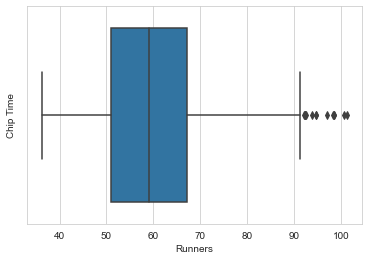

In [52]:
# Boxplot para vizualização dessa análise
ax = sns.boxplot(x = df7["Runner_mins"])
plt.ylabel('Chip Time')
plt.xlabel('Runners')
plt.show()

c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


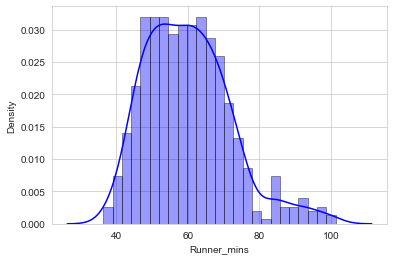

In [53]:
# Plot de um gráfico de distribuição dos tempos dos chips dos corredores
x = df7['Runner_mins']
ax = sns.distplot(x, hist = True, kde = True, rug = False, color = 'blue', bins = 25, hist_kws = {'edgecolor':'black'})
plt.show()

Comparação de desempenho entre homens e mulheres de várias faixas etárias.

In [54]:
# Separando os dados
f_runners = df7.loc[df7[' Gender'] == ' F']['Runner_mins']
m_runners = df7.loc[df7[' Gender'] == ' M']['Runner_mins']

c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\julio\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


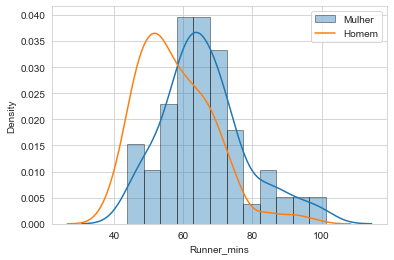

In [57]:
# Criaremos os 2 plots em uma só figura para facilitar a comparação
sns.distplot(f_runners, hist = True, kde = True, rug = False, hist_kws = {'edgecolor':'black'}, label = 'Mulher')
sns.distplot(m_runners, hist = False, kde = True, rug = False, hist_kws = {'edgecolor':'black'}, label = 'Homem')
plt.legend()

**Conclusão**:

- A distribuição indica que as mulheres eram mais lentas que os homens, em média.

In [58]:
# Computando estatísticas resumidas para homens e mulheres separadamente usando o método groupby ()
g_stats = df7.groupby(" Gender", as_index = True).describe()
g_stats

Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667

**Conclusão**:
    
- O tempo médio de chip para todas as mulheres e homens foi de ~ 66 minutos e ~ 58 minutos, respectivamente, comprovando a análise do gráfico. 

Boxplot para comparação das amostras de homens e mulheres.

Text(0.5, 0.98, '')

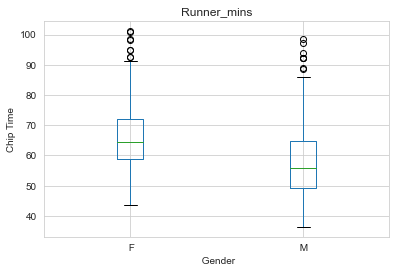

In [59]:
# Plot
df7.boxplot(column = 'Runner_mins', by = ' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")